# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [77]:
#!pip install --user --upgrade pip

In [78]:
#!pip install tensorflow
#!pip install keras
'''
Por defecto, keras tira de GPU
'''

'\nPor defecto, keras tira de GPU\n'

Empezamos importando librerías

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pandas as pd
import numpy as np

Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [2]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Vemos dimensiones del dataset

In [3]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [82]:
'''
X_train --> 60 000 fotos, cada una tiene 28x28 pixels   y_train --> 60 000 etiquetas

foto_0 -------> 0
foto_1 -------> 0
foto_2 -------> 0
foto_3 -------> 1
foto_4 -------> 1
foto_5 -------> 3


'''

'\nX_train --> 60 000 fotos, cada una tiene 28x28 pixels   y_train --> 60 000 etiquetas\n\nfoto_0 -------> 0\nfoto_1 -------> 0\nfoto_2 -------> 0\nfoto_3 -------> 1\nfoto_4 -------> 1\nfoto_5 -------> 3\n\n\n'

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

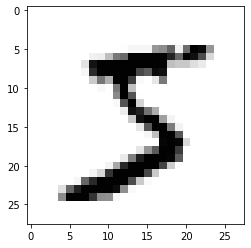

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap=plt.cm.get_cmap("Greys"))

Cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

¿Se te ocurre alguna manera de normalizar los datos?

In [6]:
# Preprocess the data (these are NumPy arrays). Aplano a una dimension cada imagen.
# Escalamos ya que vamos a usar gradient descent, y le afecta mucho la escala de las features.
# Ejecutar esta celda solo una vez. Si no, reescalará

# 0 - 255 --> 0 - 1

X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")



In [7]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [8]:
# Reserve 10,000 samples for validation. Entraran dentro del modelo para validar. No es validacion cruzada
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

print(X_val)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [9]:
# Una manera de declarar la red neuronal

# Siempre hay que declarar la capa sequential para empezar a declarar la red
# Se trata de la API sequential
model = keras.models.Sequential()

# Flatten, aplana en un unico vector. Y especificamos el tamaño de la entrada
# Es como si hiciese un .reshape(-1, 28*28)
# "kernel_initializer" o "bias_initializer" No lo usamos pero seria para inicializar los pesos de otra manera
model.add(keras.layers.Flatten(input_shape=(28,28)))

# Capas de la red. Dense es la capa de neuronas. Necesitamos numero y activacion
model.add(keras.layers.Dense(units = 300, activation = "relu"))

model.add(keras.layers.Dense(100, activation="relu"))


# Capa de salida, con tamaño del número de clases
# Suele ir aqui un softmax. Para multiclase guay. Si es binaria -> sigmoide
model.add(keras.layers.Dense(10, activation="softmax"))


In [10]:
# Otra manera de declarar la red neuronal

capas = [
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
]

model = keras.models.Sequential(capas)

Podemos ver las capas, y acceder a sus elementos

In [11]:
print(model.layers[1])
model.layers

Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [12]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

# 784 features (pixeles de las imagenes) x 300 neuronas
# Los pesos están inicializados aleatoriamente
weights.shape

(784, 300)

In [14]:
biases.shape

(300,)

Establecemos la configuración de ejecución... el compile.

In [16]:
# Se especifica la configuración del entrenamiento (optimizador, pérdida, métricas):
model.compile(
    # Stocastic gradient descent. El algoritmo para minimizar la loss function
    # El stocastic va haciendo muestreo en cada evaluacion, no usa todo.
    # Podemos modificar el learning rate(0.01 por defecto) mediante el parametro lr
    optimizer = keras.optimizers.SGD(),
    
    # Loss function to minimize
    # sparse_categorical_crossentropy cuando tenemos un label en nuna columna
    # Si lo tuviesemos en varias tipo dummy, cogeriamos categorical_crossentropy
    loss = keras.losses.SparseCategoricalCrossentropy(),

    
    # List of metrics to monitor
    metrics = [keras.metrics.SparseCategoricalAccuracy()]
)


In [17]:
# Equivalente
model.compile(optimizer="sgd",
             loss="sparse_categorical_crossentropy",
             metrics = ["accuracy"])


In [18]:
# Summary
# La primera hidden layer tiene 784 entradas x 300 salidas
# Son los 235500 params = 783x300 + 300 (bias)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [20]:
# Entrenamos el modelo con un batch_size de 64 imágenes por cada iteración, 10 epochs y especificando cuál es el conjunto de validación.
print("fit model on training data")
history = model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 15,
validation_data = (X_val, y_val)
)

'''
En el entreanamiento solo hay que fijarse que el loss va para abajo, es bueno.
Si vemos que ya no baja mas, no serán necesarias tantas epochs.
Imprimera tantas lineas como epochs hayamos puesto

Tampoco usamos el class_weight, que le da más peso a las clases con pocas muestras
Util para datasets desbalanceados.

El loss que muestra es el categoricalcrossentropy
'''



    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    # En vez de validation data podemos usar el argumento validation_split=0.1
    

'''
En el entreanamiento solo hay que fijarse que el loss va para abajo, es bueno.
Si vemos que ya no baja mas, no serán necesarias tantas epochs.
Imprimera tantas lineas como epochs hayamos puesto

Tampoco usamos el class_weight, que le da más peso a las clases con pocas muestras
Util para datasets desbalanceados.

El loss que muestra es el categoricalcrossentropy
'''


fit model on training data
Epoch 1/15
782/782 [==============================] - 8s 9ms/step - loss: 0.9305 - accuracy: 0.7671 - val_loss: 0.4044 - val_accuracy: 0.8969
Epoch 2/15
782/782 [==============================] - 7s 8ms/step - loss: 0.3809 - accuracy: 0.8948 - val_loss: 0.3068 - val_accuracy: 0.9132
Epoch 3/15
782/782 [==============================] - 6s 7ms/step - loss: 0.3127 - accuracy: 0.9115 - val_loss: 0.2676 - val_accuracy: 0.9251
Epoch 4/15
782/782 [==============================] - 6s 7ms/step - loss: 0.2771 - accuracy: 0.9210 - val_loss: 0.2438 - val_accuracy: 0.9318
Epoch 5/15
782/782 [==============================] - 13s 17ms/step - loss: 0.2520 - accuracy: 0.9288 - val_loss: 0.2253 - val_accuracy: 0.9353
Epoch 6/15
782/782 [==============================] - 10s 13ms/step - loss: 0.2323 - accuracy: 0.9346 - val_loss: 0.2080 - val_accuracy: 0.9403
Epoch 7/15
782/782 [==============================] - 11s 14ms/step - loss: 0.2156 - accuracy: 0.9387 - val_loss: 0.1

'\nEn el entreanamiento solo hay que fijarse que el loss va para abajo, es bueno.\nSi vemos que ya no baja mas, no serán necesarias tantas epochs.\nImprimera tantas lineas como epochs hayamos puesto\n\nTampoco usamos el class_weight, que le da más peso a las clases con pocas muestras\nUtil para datasets desbalanceados.\n\nEl loss que muestra es el categoricalcrossentropy\n'

In [24]:
len(X_train)/64

781.25

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [25]:
print("fit model on training data")
history = model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 15,
validation_data = (X_val, y_val)
)


fit model on training data
Epoch 1/15
782/782 [==============================] - 6s 8ms/step - loss: 0.1287 - accuracy: 0.9630 - val_loss: 0.1321 - val_accuracy: 0.9626
Epoch 2/15
782/782 [==============================] - 7s 9ms/step - loss: 0.1230 - accuracy: 0.9650 - val_loss: 0.1278 - val_accuracy: 0.9644
Epoch 3/15
782/782 [==============================] - 9s 11ms/step - loss: 0.1174 - accuracy: 0.9671 - val_loss: 0.1259 - val_accuracy: 0.9644
Epoch 4/15
782/782 [==============================] - 8s 11ms/step - loss: 0.1121 - accuracy: 0.9682 - val_loss: 0.1244 - val_accuracy: 0.9656
Epoch 5/15
782/782 [==============================] - 9s 11ms/step - loss: 0.1074 - accuracy: 0.9697 - val_loss: 0.1205 - val_accuracy: 0.9662
Epoch 6/15
782/782 [==============================] - 8s 11ms/step - loss: 0.1031 - accuracy: 0.9711 - val_loss: 0.1191 - val_accuracy: 0.9662
Epoch 7/15
782/782 [==============================] - 9s 11ms/step - loss: 0.0990 - accuracy: 0.9721 - val_loss: 0.11

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [26]:
print(history.params)
print(history.epoch)
history.history

{'verbose': 1, 'epochs': 15, 'steps': 782}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


{'loss': [0.12867343425750732,
  0.12296117842197418,
  0.11735933274030685,
  0.11208629608154297,
  0.10743284970521927,
  0.10305939614772797,
  0.09899760782718658,
  0.09489226341247559,
  0.0912662073969841,
  0.08805843442678452,
  0.08482921868562698,
  0.08162510395050049,
  0.07876212894916534,
  0.07584592700004578,
  0.07329331338405609],
 'accuracy': [0.9629600048065186,
  0.9649800062179565,
  0.9670799970626831,
  0.9681800007820129,
  0.9696999788284302,
  0.9710999727249146,
  0.9721199870109558,
  0.9737399816513062,
  0.974560022354126,
  0.975380003452301,
  0.9766799807548523,
  0.9774799942970276,
  0.9786999821662903,
  0.9796000123023987,
  0.9800400137901306],
 'val_loss': [0.1321360021829605,
  0.1278219074010849,
  0.1258515864610672,
  0.12440808117389679,
  0.12051474303007126,
  0.11907895654439926,
  0.11241123080253601,
  0.11047441512346268,
  0.10808586329221725,
  0.10632321983575821,
  0.10661128908395767,
  0.10319656133651733,
  0.10190863162279129

(0.0, 1.0)

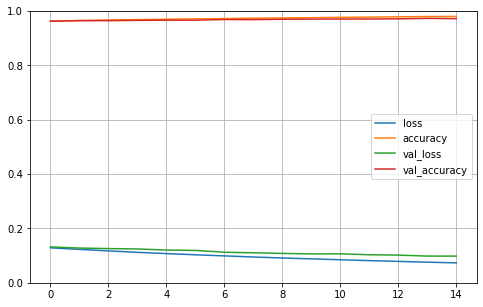

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Podemos ver como evoluciona el entrenamiento, en funcion de los epochs
# Validacion y training estan muy cerca, no hay overfitting!
# Todavia no ha acabado de coverger ya que el loss en validacion sigue bajando,
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]



Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [28]:
# Obtenemos el "score" a partir del conjunto de test
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")

# Metodo evaluate para que nos de el error vs las metricas elegidas en la funcion compile
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)


Evaluate on test data
313/313 [==============================] - 1s 4ms/step - loss: 0.0966 - accuracy: 0.9700
test loss, test acc: [0.09656545519828796, 0.9700000286102295]


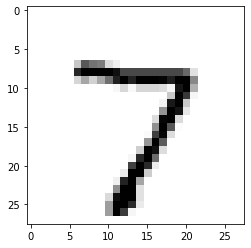

In [29]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap = plt.cm.get_cmap("Greys")); 

In [30]:
'''
Ojo aqui viene slicing xq presupone que le entran varios inputs
Nos da las probabilidades de pertenecer a una clase u otra.
'''
predictions = model.predict(X_test[:1]).round(3)
print("predictions shape:", predictions.shape)
predictions


1/1 [==============================] - 1s 537ms/step
predictions shape: (1, 10)


array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ]], dtype=float32)

In [31]:
predictions.max()

0.999

In [32]:
predictions.argmax()

7

### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [33]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing["target"]
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Divimos en train, test y validation

In [35]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                             housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [36]:
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [37]:
model = keras.models.Sequential([
    
    # no hace falta capa de flatten, no hay que aplanar nada
    keras.layers.Dense(30, activation="relu",
                      input_shape = X_train.shape[1:]),
    keras.layers.Dense(1) # una unica neurona de salida
])

model.compile(loss = "mean_squared_error", optimizer ="sgd")

history = model.fit(X_train, y_train, epochs=20,
                   validation_data = (X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # como si fueran instancias nuevas
y_pred = model.predict(X_new)


Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 0.8057 - val_loss: 0.5320
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 1.3196 - val_loss: 0.8629
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5032 - val_loss: 0.4756
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4561 - val_loss: 0.4490
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4433 - val_loss: 0.4403
Epoch 6/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4301 - val_loss: 0.4281
Epoch 7/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4194 - val_loss: 0.4385
Epoch 8/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4145 - val_loss: 0.4154
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4070 - val_loss: 0.4126
Epoch 10/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4006 - val_loss: 0.4059

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [38]:
model.save("my_keras_model.h5")

In [40]:
# Lo volvemos a cargar
model = keras.models.load_model("my_keras_model.h5")

### Callbacks
Sirven para que el modelo se vaya guardando tras cada epoch, asi no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [41]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.h5")
history = model.fit(X_train, y_train, epochs = 10, callbacks = [checkpoint_cb])

history = model.fit(X_train, y_train, epochs = 20,
                   validation_data = (X_valid, y_valid),
                   callbacks = [checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 0.3579
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3545
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3538
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3494
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3476
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3495
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3462
Epoch 8/10
363/363 [==============================] - 3s 9ms/step - loss: 0.3445
Epoch 9/10
363/363 [==============================] - 3s 9ms/step - loss: 0.3403
Epoch 10/10
363/363 [==============================] - 3s 7ms/step - loss: 0.3399
Epoch 1/20
363/363 [==============================] - 4s 12ms/step - loss: 0.3430 - val_loss: 0.3434
Epoch 2/20
363/363 [==============================] - 3s 7ms/step - loss: 0.3378 - val_l

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [112]:
# 10 esta bien. Lo pondemos a 5 para el ejercicio


Epoch 1/100
363/363 [==============================] - 2s 6ms/step - loss: 0.3276 - val_loss: 0.3520
Epoch 2/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3394 - val_loss: 0.3691
Epoch 3/100
363/363 [==============================] - 2s 6ms/step - loss: 0.3236 - val_loss: 0.4377
Epoch 4/100
363/363 [==============================] - 2s 6ms/step - loss: 0.3317 - val_loss: 0.3622
Epoch 5/100
363/363 [==============================] - 2s 6ms/step - loss: 0.3311 - val_loss: 0.3538
Epoch 6/100
363/363 [==============================] - 2s 7ms/step - loss: 0.3251 - val_loss: 0.3541


### Dashboard
Keras tiene implementado un dashboard para monitorizar las ejecuciones del modelo

Epoch 1/50
363/363 [==============================] - 2s 6ms/step - loss: 0.3267 - val_loss: 0.3540
Epoch 2/50
363/363 [==============================] - 2s 6ms/step - loss: 0.3260 - val_loss: 0.3719
Epoch 3/50
363/363 [==============================] - 2s 7ms/step - loss: 0.3248 - val_loss: 0.3584
Epoch 4/50
363/363 [==============================] - 2s 5ms/step - loss: 0.3305 - val_loss: 0.3463
Epoch 5/50
363/363 [==============================] - 2s 5ms/step - loss: 0.3224 - val_loss: 0.3525
Epoch 6/50
363/363 [==============================] - 2s 5ms/step - loss: 0.3216 - val_loss: 0.3499
Epoch 7/50
363/363 [==============================] - 2s 4ms/step - loss: 0.3209 - val_loss: 0.3574
Epoch 8/50
363/363 [==============================] - 1s 4ms/step - loss: 0.3234 - val_loss: 0.3808
Epoch 9/50
363/363 [==============================] - 2s 4ms/step - loss: 0.3234 - val_loss: 0.3478
Epoch 10/50
363/363 [==============================] - 2s 4ms/step - loss: 0.3219 - val_loss: 0.8798

'\nPara lanzarlo desde el jupyter notebook\n%load_ext tensorboard\n%tensorboard --logdir=./my_logs --port=6006\n\nPara lanzarlo desde el terminal, hay que estar en la carpeta de los logs\ntensorboard --logdir=./my_logs --port=6006\n\n'

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 19596), started 3 days, 11:47:51 ago. (Use '!kill 19596' to kill it.)